In [1]:
import numpy as np

In [2]:
class MSE:
    
    def __init__(self, rate=0.01, cycles=1000):
        self.rate = rate
        self.cycles = cycles
        
    def run(self, points, ids):
        self.theta = np.zeros(np.size(points[0]))
        self.bias = 0
        
        self.loss = np.zeros(self.cycles)
        
        for i in range(self.cycles):
            for point, truth in zip(points, ids):
                error = (truth - self.predict(point)) / 2
                self.compute_loss(i, point, error, len(ids))
                shift = abs(error) * self.rate
                dot = np.dot(point, self.theta)
                self.bias -= shift * (2 / len(ids)) * (dot - truth)
                self.theta -= shift * point * (2 / len(ids)) * (dot - truth)
        
        self.report(points, ids)
        return self

    def compute_loss(self, i, x, y, m):
        dot = np.dot(x, self.theta)
        self.loss[i] += ((y - dot)**2) / m
    
    def predict(self, ds):
        return np.where(np.dot(ds, self.theta) + self.bias > 0, 1, -1)
    
    def report(self, points, ids):
        miss = []
        for point, truth in zip(points, ids):
            prediction = self.predict(point)
            if truth - prediction != 0:
                miss.append([point, prediction, truth])
        if len(miss) > 0:
            print("Mislabeled:")
            for c in miss:
                print("{0}, prediction: {1}, truth: {2}".format(c[0], c[1], c[2]))

In [3]:
mse = MSE()

In [4]:
data = np.load('Data2/data.npz')
x = data['x']
y = np.where(data['y'] > 0, -1, 1)
print(x)
print(y)

[[ 0.38379701  1.45470229]
 [-1.76341782  3.05431453]
 [ 0.86457926  0.67281117]
 [ 0.25319139  2.16858132]
 [ 0.50812768  0.71886278]
 [-0.44106153  1.38948007]
 [ 0.96296597  0.52277644]
 [ 1.53950718 -0.05375071]
 [ 0.26327587  1.94018831]
 [ 1.89920607  0.68097808]
 [ 1.02946096  0.40774384]
 [ 1.64970325 -0.19367112]
 [ 1.25519279  1.40269105]
 [ 1.72568592  1.72519665]
 [ 1.28628023  2.16691251]
 [ 3.76552754  0.83570364]
 [ 1.35902501  0.70825309]
 [ 1.76453094  1.03100161]
 [ 2.83830349  0.335233  ]
 [ 0.9498294   0.9736225 ]]
[-1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1]


In [5]:
out = mse.run(x,y)

Mislabeled:
[0.38379701 1.45470229], prediction: 1, truth: -1
[0.86457926 0.67281117], prediction: 1, truth: -1
[ 1.53950718 -0.05375071], prediction: -1, truth: 1
[1.89920607 0.68097808], prediction: -1, truth: 1
[1.02946096 0.40774384], prediction: 1, truth: -1
[1.25519279 1.40269105], prediction: -1, truth: 1


In [6]:
print(out.theta)

[-0.0049518  -0.00121417]


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

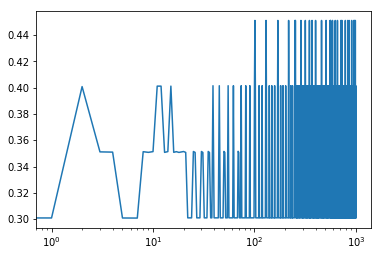

In [8]:
plt.plot(out.loss)
plt.xscale('log')

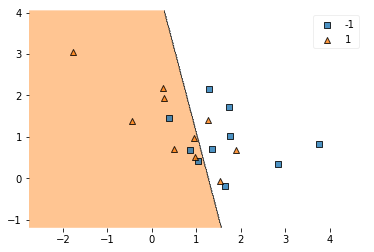

In [9]:
plot_decision_regions(x, y, clf=mse)